In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def add_goal (X, Y,s, r, loc):

  delx = np.zeros_like(X)
  dely = np.zeros_like(Y)
  for i in range(len(x)):
    for j in range(len(y)):
      d= np.sqrt((loc[0]-X[i][j])**2 + (loc[1]-Y[i][j])**2)
      theta = np.arctan2(loc[1]-Y[i][j], loc[0] - X[i][j])
      if d< r:
        delx[i][j] = 0
        dely[i][j] =0
      elif d>r+s:
        delx[i][j] = 50* s *np.cos(theta)
        dely[i][j] = 50 * s *np.sin(theta)
      else:
        delx[i][j] = 50 * (d-r) *np.cos(theta)
        dely[i][j] = 50 * (d-r) *np.sin(theta)
  return delx, dely


In [32]:
x = np.arange(-0,100,1)
y = np.arange(-0,100,1)
goal = [60,40]
s = 7
r=2
seek_points = np.array([[0,42]]) 
X, Y = np.meshgrid(x,y)
delx, dely =add_goal(X, Y,s, r , goal)

def plot_graph(X, Y, delx, dely,obj, fig, ax, loc,r,i, color,start_goal=np.array([[0,0]])  ):
  
  ax.quiver(X, Y, delx, dely)
  ax.add_patch(plt.Circle(loc, r, color=color))
  ax.set_title(f'Robot path with {i} obstacles ')
  ax.annotate(obj, xy=loc, fontsize=10, ha="center")
  return ax

In [33]:
def add_obstacle(X, Y , delx, dely, goal):
  s = 7
  r = 2
  centroid = [[0,0],[1.50,0],[0.65,0.15],[0.75,-0.50],[1.10,0.40]]
  list = [[x[0]*40 +20,x[1]*40 +40]  for x in centroid] 
  obstacle = list[k]
  for i in range(len(x)):
    for j in range(len(y)):
      
      d_goal = np.sqrt((goal[0]-X[i][j])**2 + ((goal[1]-Y[i][j]))**2)
      d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)
      theta_goal= np.arctan2(goal[1] - Y[i][j], goal[0]  - X[i][j])
      theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])
      if d_obstacle < r:
        delx[i][j] = -1*np.sign(np.cos(theta_obstacle))*5 +0
        dely[i][j] = -1*np.sign(np.cos(theta_obstacle))*5  +0
      elif d_obstacle>r+s:
        delx[i][j] += 0 -(50 * s *np.cos(theta_goal))
        dely[i][j] += 0 - (50 * s *np.sin(theta_goal))
      elif d_obstacle<r+s :
        delx[i][j] += -150 *(s+r-d_obstacle)* np.cos(theta_obstacle)
        dely[i][j] += -150 * (s+r-d_obstacle)*  np.sin(theta_obstacle) 
      if d_goal <r+s:
        if delx[i][j] != 0:
          delx[i][j]  += (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  += (50 * (d_goal-r) *np.sin(theta_goal))
        else:
          
          delx[i][j]  = (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  = (50 * (d_goal-r) *np.sin(theta_goal))
          
      if d_goal>r+s:
        if delx[i][j] != 0:
          delx[i][j] += 50* s *np.cos(theta_goal)
          dely[i][j] += 50* s *np.sin(theta_goal)
        else:
          
          delx[i][j] = 50* s *np.cos(theta_goal)
          dely[i][j] = 50* s *np.sin(theta_goal) 
      if d_goal<r:
          delx[i][j] = 0
          dely[i][j] = 0
   
  return delx, dely, obstacle, r

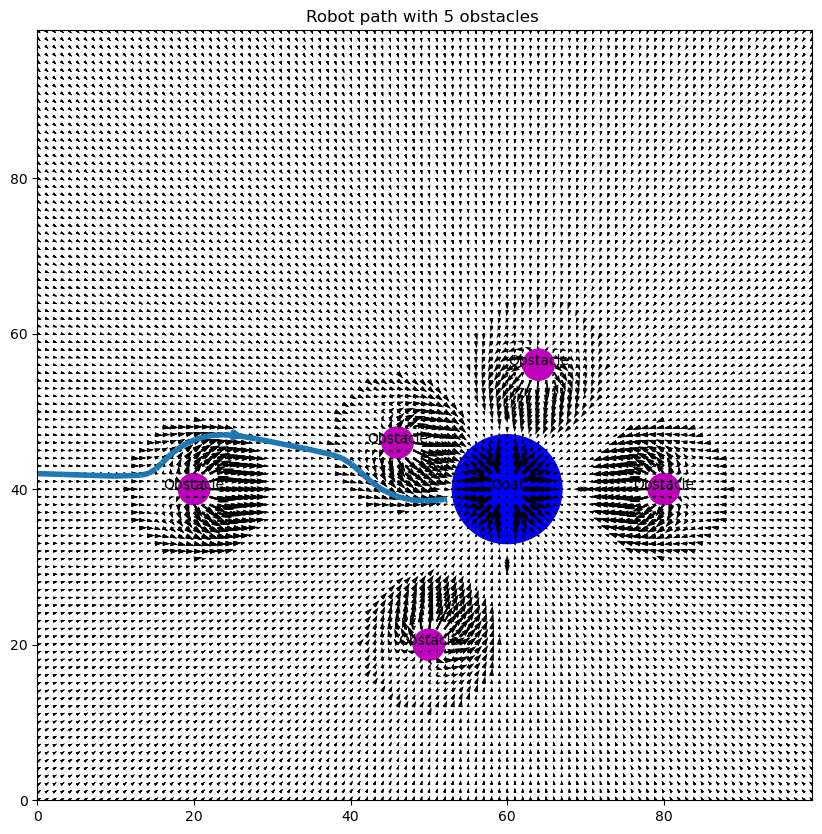

In [34]:
for i in range(5,6):
  fig, ax = plt.subplots(figsize = (10,10))
  for _ in range(1):
    goal = [60,40]
    delx, dely =add_goal(X, Y,s, r , goal)
    
    plot_graph(X, Y, delx, dely , 'Goal',fig, ax, goal, 7,0, 'b' )
    
    for j in range(i):
      k=j
      delx, dely, loc, r = add_obstacle(X,Y, delx,dely,goal)
      plot_graph(X, Y, delx, dely , 'Obstacle',fig, ax, loc, r , j+1,'m')
    ax.streamplot(X,Y,delx,dely, start_points=seek_points,linewidth=4, cmap='autu')
    
  plt.show()